In [1]:
# Jupyter Notebook to Analyze and Generate Insights
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

# Load Data from APIs (Example of quiz performance data)
quiz_data_url = 'https://api.jsonserve.com/rJvd7g'
historical_data_url = 'https://api.jsonserve.com/XgAgFJ'


In [7]:
import requests
import pandas as pd

try:
    # Fetch the JSON data using HTTP GET requests
    quiz_response = requests.get(quiz_data_url)
    historical_response = requests.get(historical_data_url)

    # Check if the requests were successful
    if quiz_response.status_code == 200 and historical_response.status_code == 200:
        # Parse the JSON data into DataFrames
        quiz_data = pd.json_normalize(quiz_response.json())
        historical_data = pd.json_normalize(historical_response.json())

        # Display the first few rows of each dataset
        print("Quiz Data:")
        print(quiz_data.head())

        print("\nHistorical Data:")
        print(historical_data.head())
    else:
        print("Error fetching data:")
        print(f"Quiz Data HTTP Status: {quiz_response.status_code}")
        print(f"Historical Data HTTP Status: {historical_response.status_code}")
        print("Quiz Data Response:", quiz_response.text)
        print("Historical Data Response:", historical_response.text)

except ValueError as e:
    print("Error parsing JSON:", e)

except requests.RequestException as e:
    print("Error during the HTTP request:", e)


Quiz Data:
       id  quiz_id                       user_id  \
0  336566       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2   

                    submitted_at                     created_at  \
0  2025-01-17T15:51:29.859+05:30  2025-01-17T15:51:29.871+05:30   

                      updated_at  score  trophy_level accuracy speed  ...  \
0  2025-01-17T15:51:29.871+05:30     32             2     80 %   100  ...   

  quiz.exam_id quiz.show_unanswered  quiz.ends_at  quiz.lives quiz.live_count  \
0         None                False    2025-01-18        None       Free Test   

  quiz.coin_count quiz.questions_count   quiz.daily_date  \
0              -1                  128  January 17, 2025   

  quiz.max_mistake_count  quiz.reading_materials  
0                     15                      []  

[1 rows x 68 columns]

Historical Data:
       id  quiz_id                       user_id  \
0  336497       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
1  336448        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
2  333330  

In [19]:
if 'quiz.topic' in quiz_data.columns and 'correct_answers' in quiz_data.columns and 'incorrect_answers' in quiz_data.columns:
        # Calculate accuracy as the ratio of correct answers to total questions
        quiz_data['accuracy'] = quiz_data['correct_answers'] / (quiz_data['correct_answers'] + quiz_data['incorrect_answers'])

        # Group by topic and calculate the mean accuracy
        accuracy_by_topic = quiz_data.groupby('quiz.topic')['accuracy'].mean()

        print("\nAccuracy by Topic:")
        print(accuracy_by_topic)

        # Optional: Save the accuracy results to a CSV file
        accuracy_by_topic.to_csv('accuracy_by_topic.csv', index=True)

else:
        print("\nRequired columns ('quiz.topic', 'correct_answers', 'incorrect_answers') are missing from quiz_data")


Accuracy by Topic:
quiz.topic
Structural Organisation in Animals    0.8
Name: accuracy, dtype: float64


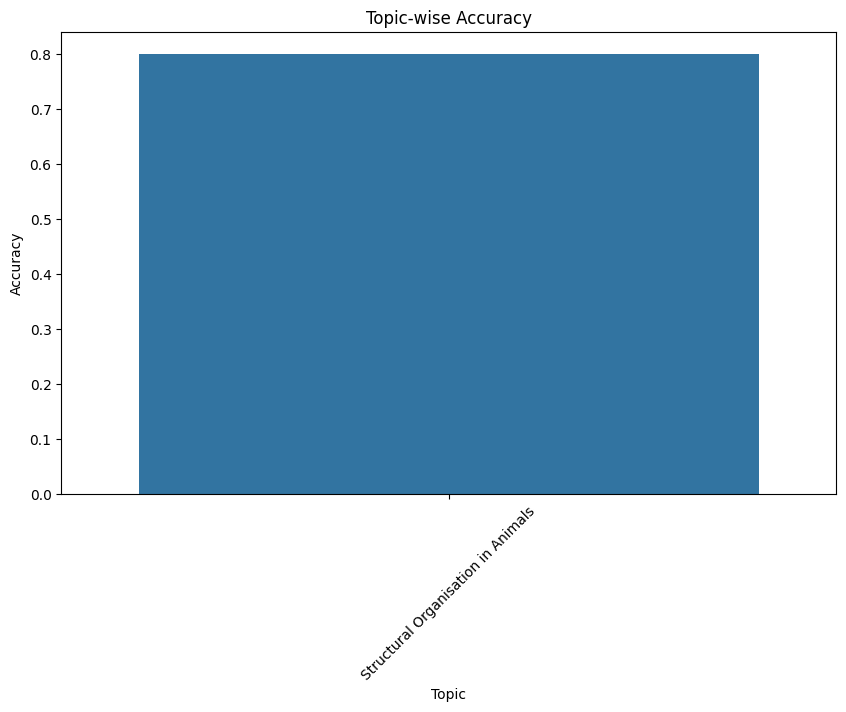

In [20]:
# Visualizing accuracy by topic
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_by_topic.index, y=accuracy_by_topic.values)
plt.title('Topic-wise Accuracy')
plt.xlabel('Topic')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [21]:

# Identifying weak areas (accuracy below 50%)
weak_areas = accuracy_by_topic[accuracy_by_topic < 0.5]
print("Weak Areas:")
print(weak_areas)

Weak Areas:
Series([], Name: accuracy, dtype: float64)


In [23]:
# Ensure the correct column is used for quiz dates
if 'submitted_at' in historical_data.columns:
    # Convert 'submitted_at' to datetime
    historical_data['quiz_date'] = pd.to_datetime(historical_data['submitted_at'])

    # Normalize the score by total questions
    historical_data['normalized_score'] = historical_data['score'] / historical_data['total_questions']

    # Sort by quiz_date and take the last 5 quizzes
    last_5_quizzes = historical_data.sort_values('quiz_date', ascending=False).head(5)

    # Display performance for the last 5 quizzes
    print("\nPerformance Over the Last 5 Quizzes:")
    print(last_5_quizzes[['quiz_date', 'normalized_score']])

else:
    print("The column 'submitted_at' is not present in the dataset.")



Performance Over the Last 5 Quizzes:
                         quiz_date  normalized_score
0 2025-01-17 15:30:18.027000+05:30          1.080000
1 2025-01-17 15:17:44.042000+05:30          4.000000
2 2025-01-16 20:13:19.682000+05:30          1.160000
3 2025-01-16 20:00:11.562000+05:30          1.565217
4 2025-01-15 20:34:39.462000+05:30          0.360000


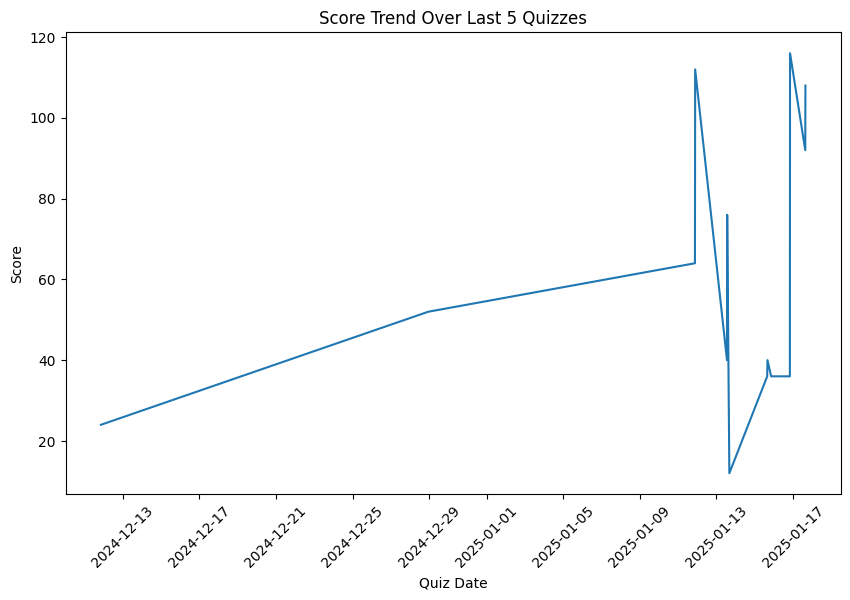

In [24]:

# Plotting trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=historical_data, x='quiz_date', y='score')
plt.title('Score Trend Over Last 5 Quizzes')
plt.xlabel('Quiz Date')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Summarize trends and provide recommendations
# This could involve providing personalized feedback based on weak areas and trends